In [1]:

import networkx as nx
import numpy as np
import random, math

import time


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm



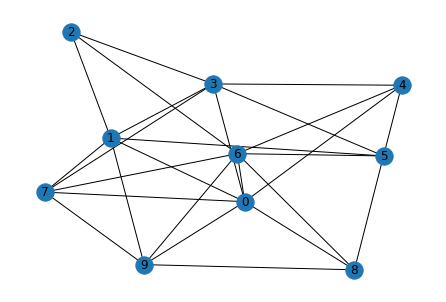

In [104]:

G = nx.erdos_renyi_graph(10, 0.5)
initial_nodes = list(G.nodes())

#G.add_node(22)
nx.draw(G, with_labels = True)


In [71]:

def edge_creator_helper(node, connection_targets):
    edges = [(node, connection_target) for connection_target in connection_targets]

    return edges

# returns list of neighbours for all the nodes in the given list
def find_neighbours(graph, node_list):
    if len(node_list) != 0:
        all_neighbours_list = np.concatenate(([list(graph[node]) for node in node_list]))
    else:
        all_neighbours_list = []

    return all_neighbours_list


In [84]:

m = 5
pm = 1

n = 10
pn = 1

# create new node, indexed as the next number in the list
def new_node_birth(graph):
    current_nodes = graph.nodes()
    new_node = max(current_nodes) + 1

    return new_node

# find parent nodes connections
def find_parent_nodes_connections(graph):
    # get the current existing nodes
    current_nodes = graph.nodes()

    # get m parent nodes
    parent_targets = np.random.choice(current_nodes, m, replace=False)

    # probability pm to connect to each m of them
    parents_edge_chance = np.random.choice([0,1], size=m, p=[1-pm,pm])

    # realised connections: cross product of the two vectors
    parent_connections = parent_targets * parents_edge_chance
    parent_connections = parent_connections[parent_connections > 0] # filter out the ones with no connection


    return parent_connections

# find parent neighbour connections
def find_parent_neighbour_connections(graph, parent_connections_list):
    # take the list of parents and find their (unique) neighbours
    parent_neighbours = np.unique(find_neighbours(graph, parent_connections_list))

    # to avoid issues: if the parents have in total less than n neighbours, take their number of neighbours instead
    n_possible_encounters = min(len(parent_neighbours), n)

    # get n parent neighbour nodes
    parent_neighbour_targets = np.random.choice(parent_neighbours, n_possible_encounters, replace=False)

    # probability pn to connect to each n of them
    parent_neighbours_edge_chance = np.random.choice([0,1], size = n_possible_encounters, p = (1-pn, pn))

    # realised connections: cross product of the two vectors
    parent_neighbours_connections = parent_neighbour_targets * parent_neighbours_edge_chance
    parent_neighbours_connections = parent_neighbours_connections[parent_neighbours_connections > 0] # filter out the ones with no connection


    return parent_neighbours_connections


find_parent_neighbour_connections(G, [1,2,3])


array([8, 2, 1, 9, 5, 7, 4])

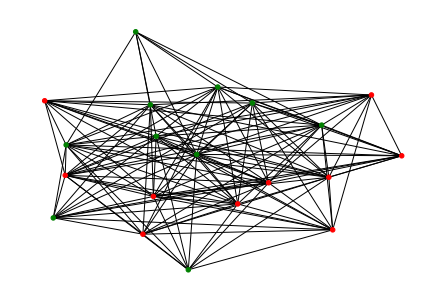

In [114]:

# big command
def update_simulation(current_graph):

    parent_connections = find_parent_nodes_connections(current_graph) # DONE
    parent_neighbour_connections = find_parent_neighbour_connections(current_graph, parent_connections) # DONE

    # add the new node
    new_node = new_node_birth(current_graph) # DONE

    # combine the two
    new_node_connections = np.concatenate((parent_connections, parent_neighbour_connections))
    new_node_edges = edge_creator_helper(new_node, new_node_connections)


    

    # copy graph with the added connections
    new_graph = current_graph
    new_graph.add_node(new_node)
    new_graph.add_edges_from(new_node_edges)

    return


update_simulation(G)
#nx.draw(G, with_labels = True)
colormap = ['green' if node in initial_nodes else 'red' for node in G]
nx.draw_kamada_kawai(G, node_color = colormap, node_size = 20, with_labels=False)
